In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Bad key "text.kerning_factor" on line 4 in
/home/mglee/anaconda3/envs/save/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
event = pd.read_excel("../../data/time series/카카오페이 ESG 활동 기사 배포 시점.xlsx")
event

,event,date,group
0,ESG 추진위원회,2022-05-24,외포괄
1,QR 재활용,2022-07-05,서집중
2,동네무료보험 서비스,2022-08-29,서포괄
3,금융사기 및 송금피해 예방,2022-09-07,서포괄
4,금융취약계층 응대 매뉴얼,2022-09-21,서집중
5,악성앱 탐지 솔루션 적용,2022-09-21,서포괄
6,상생기금 10억 조성,2022-09-27,외집중
7,금융소외계층 및 소상공인에 4억 기부,2022-10-04,외집중
8,영세중소상공인 수수료 우대,2022-10-05,서집중
9,UNGC 가입,2022-10-14,외포괄


In [17]:
lexicon_senti = pd.read_csv("../../data/time series/comments_lexicon_senti.csv")

In [18]:
lexicon_senti

,Unnamed: 0,url,text,ymd,senti
0,0,https://v.daum.net/v/20201103100309194,사회매장될놈,2020-11-03,0.0
1,1,https://n.news.naver.com/mnews/article/comment...,"공인인증서가 불편해도 믿음직했는데, 비밀번호도 없고 훨씬 편리해진 걸로 바꾸라는게 ...",2020-12-08,-2.0
2,2,https://v.daum.net/v/20181209174601850,커피는 뭐 맥도날드 ㅎㅎ 하루종일 앉아서 있어도 뭐라 안하고 키즈카페 같이 있어서 ...,2018-12-10,1.0
3,3,https://v.daum.net/v/20200924101801953,세금 떼가기 쉽게 하려는 목적으로 현금과 카드결제시 판매가를 똑같게 규정한것 자체가...,2020-09-24,-6.0
4,4,https://n.news.naver.com/mnews/article/comment...,저렇게 소독하면 지폐 사이사이는 더럽겠네 겉만 소독하능거잖아 ㅋ,2020-03-08,-2.0
...,...,...,...,...,...
344342,344342,https://n.news.naver.com/mnews/article/comment...,이러다 반등하면ㅋㅋ,2022-10-16,0.0
344343,344343,https://n.news.naver.com/mnews/article/comment...,꼭 그래야만했냐?,2021-09-09,0.0
344344,344344,https://v.daum.net/v/20220819030039561,코인보다 못한 주식시장~~~공매가 원흉이다.,2022-08-19,-2.0
344345,344345,https://v.daum.net/v/20190822101208847,노 아베,2019-08-22,0.0


In [19]:
lex_senti = lexicon_senti.groupby('ymd').mean('senti')

In [20]:
lex_senti['lag1'] = lex_senti['senti'] - lex_senti['senti'].shift(periods=1)

In [23]:
lex_senti = lex_senti.reset_index()

In [25]:
news_c_s_2022 = lex_senti[lex_senti['ymd'].apply(lambda x : '2022' in x)]

In [26]:
md = news_c_s_2022['ymd'].apply(lambda x : x[5:])

In [27]:
news_c_s_2022.reset_index(drop = True, inplace= True)

In [28]:
md.reset_index(drop=True, inplace=True)

In [29]:
event.dropna().sort_values('date')

,event,date,group
0,ESG 추진위원회,2022-05-24,외포괄
1,QR 재활용,2022-07-05,서집중
2,동네무료보험 서비스,2022-08-29,서포괄
3,금융사기 및 송금피해 예방,2022-09-07,서포괄
4,금융취약계층 응대 매뉴얼,2022-09-21,서집중
5,악성앱 탐지 솔루션 적용,2022-09-21,서포괄
6,상생기금 10억 조성,2022-09-27,외집중
7,금융소외계층 및 소상공인에 4억 기부,2022-10-04,외집중
8,영세중소상공인 수수료 우대,2022-10-05,서집중
9,UNGC 가입,2022-10-14,외포괄


In [30]:
news_c_s_2022

,ymd,Unnamed: 0,senti,lag1
0,2022-01-01,150353.936047,-0.255814,0.384246
1,2022-01-02,171677.846154,-0.803419,-0.547605
2,2022-01-03,189991.549020,-0.901961,-0.098542
3,2022-01-04,177180.964912,-0.913630,-0.011669
4,2022-01-05,172947.987288,-0.694915,0.218715
...,...,...,...,...
360,2022-12-27,179350.733945,-1.176606,-0.688606
361,2022-12-28,159296.354331,-0.692913,0.483692
362,2022-12-29,172917.919540,-0.563218,0.129695
363,2022-12-30,173208.473193,-0.585082,-0.021863


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (0,) and arg 1 with shape (2,).

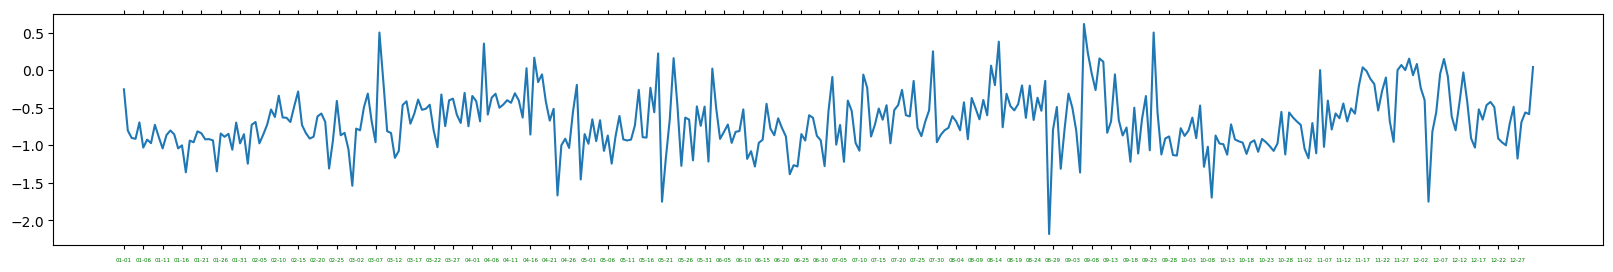

In [32]:
step_size = 5

xticks = np.arange(0, len(news_c_s_2022['ymd']), step_size)

plt.figure(figsize=(20,3))
plt.plot(news_c_s_2022['senti'])
plt.xticks(xticks, labels = md[xticks])
plt.tick_params(axis='x', length=3, pad=6, labelsize=4, labelcolor='green', top=True)

for _, row in event.iterrows():
    line_idx = news_c_s_2022[news_c_s_2022['ymd'] == str(row['date'])[5:-9]].index
    plt.axvline(line_idx, color = 'r', linestyle = '--')


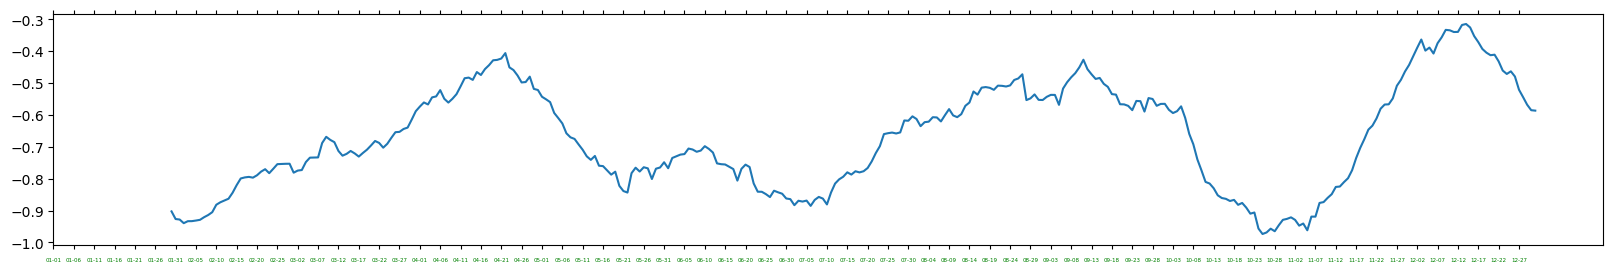

In [35]:


step_size = 5

xticks = np.arange(0, len(news_c_s_2022['ymd']), step_size)

plt.figure(figsize=(20,3))
plt.plot(pd.Series.rolling(news_c_s_2022['senti'], window = 30, center=False).mean())
plt.xticks(xticks, labels = md[xticks])
plt.tick_params(axis='x', length=3, pad=6, labelsize=4, labelcolor='green', top=True)

# for _, row in event.iterrows():
#     line_idx = news_c_s_2022[news_c_s_2022['ymd'] == str(row['date'])[5:-9]].index
#     plt.axvline(line_idx, color = 'r', linestyle = '--')
